In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

1. Data Information

In [ ]:
df = pd.read_csv("/content/archive (1).zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


2. Data Preparations

In [ ]:
df.isnull().sum() #check missing value

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [ ]:
df = df.rename(columns={'Status Gizi': 'Status',
                       'Jenis Kelamin': 'Gender',
                       'Umur (bulan)': 'Usia'}) #change columns

In [ ]:
df['Gender'] = df['Gender'].map({'laki-laki': 0, 'perempuan': 1})
df['Status'] = df['Status'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})
df

,Usia,Gender,Tinggi Badan (cm),Status
0,0,0,44.591973,1
1,0,0,56.705203,3
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,0
...,...,...,...,...
120994,60,1,100.600000,2
120995,60,1,98.300000,1
120996,60,1,121.300000,2
120997,60,1,112.200000,2


3. Data visualization

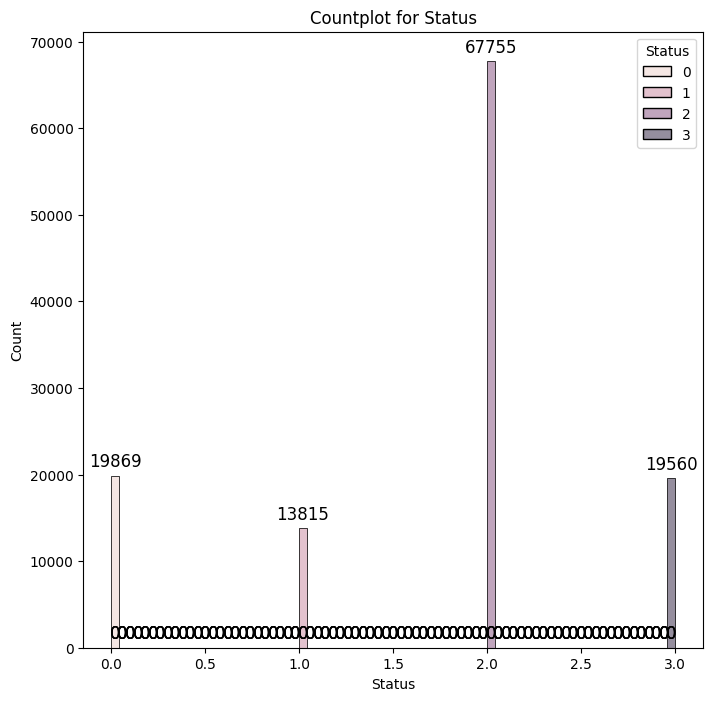

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x="Status", hue="Status")

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Countplot for Status')
plt.show()

<ipython-input-30-2dacd9cd1e2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


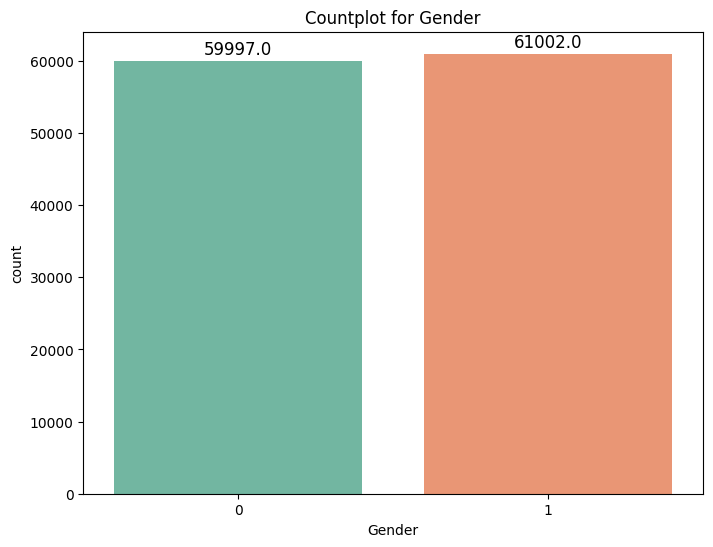

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Countplot for Gender')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2., p.get_height()),
                       ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)
plt.show()

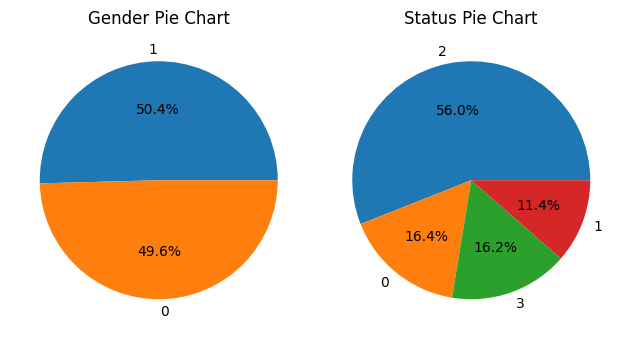

In [ ]:
b_eda = df.copy()
fig,axes = plt.subplots(1,2)
axes[0].pie(b_eda['Gender'].value_counts(),labels=b_eda['Gender'].value_counts().index,autopct = '%1.1f%%')
axes[0].set_title('Gender Pie Chart')
axes[1].pie(b_eda['Status'].value_counts(),labels=b_eda['Status'].value_counts().index,autopct = '%1.1f%%')
axes[1].set_title('Status Pie Chart')
plt.tight_layout()
plt.show()

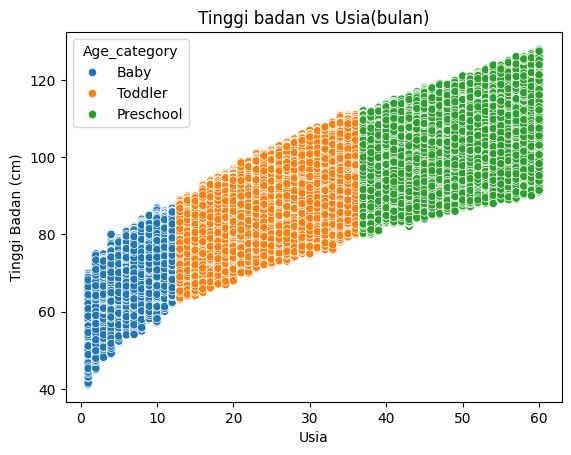

In [ ]:
age_bins = [0,12,36,60]
age_labels = ['Baby','Toddler','Preschool']
b_eda['Age_category'] = pd.cut(b_eda['Usia'],bins=age_bins,labels=age_labels,right=True)
sns.scatterplot(data=b_eda,x='Usia',y='Tinggi Badan (cm)',hue='Age_category')
plt.title('Tinggi badan vs Usia(bulan)')
plt.show()

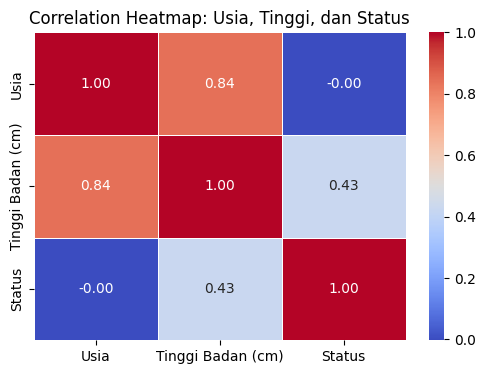

In [ ]:
#Correlation Heatmap antara usia, tinggi dan status
selected_columns = ['Usia', 'Tinggi Badan (cm)', 'Status']
selected_df = df[selected_columns]

plt.figure(figsize=(6, 4))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Usia, Tinggi, dan Status')
plt.show()

Split Data, menjadi set training dan set uji (test)

In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded[['Gender']]=encoder.fit_transform(X_train[['Gender']])
X_test_encoded[['Gender']]=encoder.fit_transform(X_test[['Gender']])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

4. Modeling

a. XGB Classification

Accuracy Score: 99.10%

Classification Report for XGBoost: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4130
           1       0.97      0.98      0.97      2790
           2       1.00      0.99      0.99     13382
           3       0.99      0.99      0.99      3898

    accuracy                           0.99     24200
   macro avg       0.99      0.99      0.99     24200
weighted avg       0.99      0.99      0.99     24200



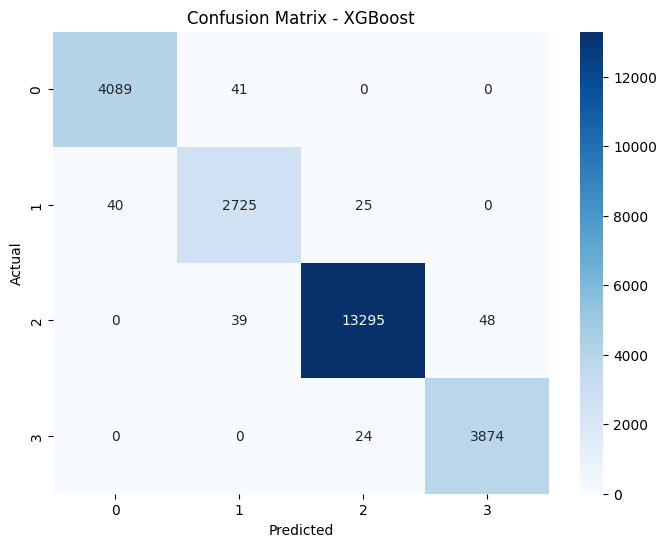

In [ ]:
from sklearn.model_selection import cross_val_score

# hyperparameter awal
xgbc_model = XGBClassifier(random_state=42)

# Lakukan cross-validation dengan metode yang lebih tepat
cv_scores = cross_val_score(xgbc_model, X_train_encoded, y_train_encoded, cv=5)

# Training model dengan data latih utuh
xgbc_model.fit(X_train_encoded, y_train_encoded)

# Lakukan prediksi dengan model yang telah dilatih
y_pred_encoded = xgbc_model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluasi akurasi
acc_xgbc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_xgbc*100:.2f}%\n")

# Classification Report
print("Classification Report for XGBoost: ")
print(classification_report(y_test, y_pred))

# Confusion Matrix for XGBoost
conf_matrix_xgboost = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Testing model
# Model 1
test = pd.DataFrame({'Usia': [20], 'Gender': [1], 'Tinggi Badan (cm)': [86.2]})

pred = xgbc_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 2
test = pd.DataFrame({'Usia': [10], 'Gender': [0], 'Tinggi Badan (cm)': [90]})

pred = xgbc_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 3
test = pd.DataFrame({'Usia': [12], 'Gender': [0], 'Tinggi Badan (cm)': [60.9]})

pred = xgbc_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 4
test = pd.DataFrame({'Usia': [17], 'Gender': [1], 'Tinggi Badan (cm)': [73.9]})

pred = xgbc_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))


Predicted Score = [2]
Predicted Score = [3]
Predicted Score = [0]
Predicted Score = [1]


b. KKN Algorithm

Accuracy Score: 99.90%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      2790
           2       1.00      1.00      1.00     13382
           3       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



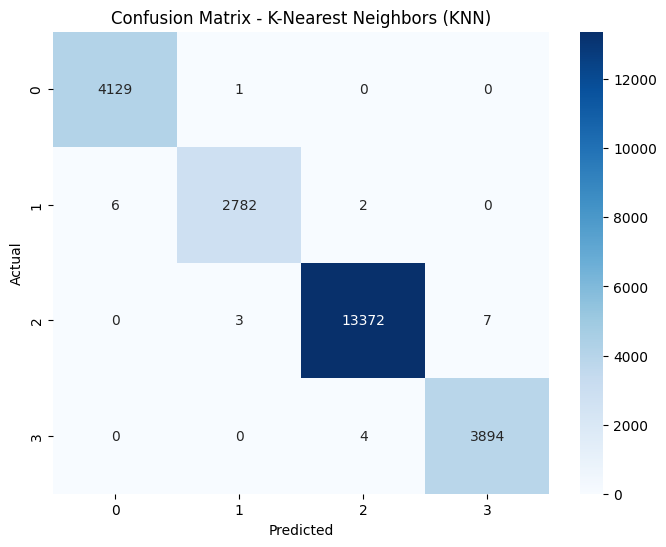

In [ ]:
knn = KNeighborsClassifier()

#inisialisasi model
knn_model = KNeighborsClassifier(n_neighbors=1)

#pelatihan model dengan data latih
knn_model.fit(X_train_encoded, y_train_encoded)

#prediksi model
y_pred_encoded = knn_model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

#menampilkan akurasi score klasifikasi dengan algortima knn
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_knn*100:.2f}%\n")

# Laporan Klasifikasiprint("Classification Report for KNN Algorithm: ")
print(classification_report(y_test, y_pred))


# Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - K-Nearest Neighbors (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Testing model
# Model 1
test = pd.DataFrame({'Usia': [20], 'Gender': [1], 'Tinggi Badan (cm)': [86.2]})

pred = knn_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 2
test = pd.DataFrame({'Usia': [10], 'Gender': [0], 'Tinggi Badan (cm)': [90]})

pred = knn_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 3
test = pd.DataFrame({'Usia': [12], 'Gender': [0], 'Tinggi Badan (cm)': [60.9]})

pred = knn_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 4
test = pd.DataFrame({'Usia': [17], 'Gender': [1], 'Tinggi Badan (cm)': [73.9]})

pred = knn_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [2]
Predicted Score = [3]
Predicted Score = [0]
Predicted Score = [1]


c. Simple Decision Tree

Accuracy Score: 91.66%

Classification Report for sdt 
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4130
           1       0.81      0.76      0.78      2790
           2       0.92      0.97      0.95     13382
           3       0.97      0.91      0.93      3898

    accuracy                           0.92     24200
   macro avg       0.90      0.87      0.89     24200
weighted avg       0.92      0.92      0.92     24200



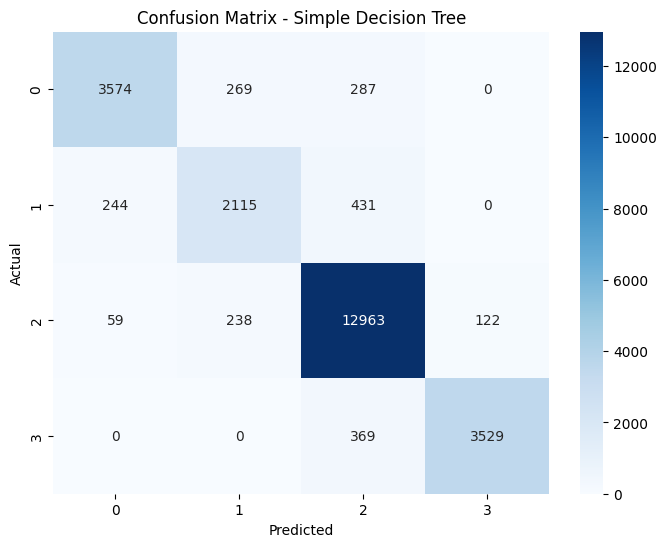

In [ ]:
#Inisialisasi Model
sdt_model = DecisionTreeClassifier(max_depth=10)
sdt_model.fit(X_train_encoded, y_train_encoded)

#Pelatihan Model:
y_pred_encoded = sdt_model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

#Prediksi Model
acc_sdt = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_sdt*100:.2f}%\n")

# Classification Report
print("Classification Report for sdt ")
print(classification_report(y_test, y_pred))

# Confusion Matrix for SDT
conf_matrix_sdt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sdt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Simple Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Testing model
# Model 1
test = pd.DataFrame({'Usia': [20], 'Gender': [1], 'Tinggi Badan (cm)': [86.2]})

pred = sdt_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 2
test = pd.DataFrame({'Usia': [10], 'Gender': [0], 'Tinggi Badan (cm)': [90]})

pred = sdt_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 3
test = pd.DataFrame({'Usia': [12], 'Gender': [0], 'Tinggi Badan (cm)': [60.9]})

pred = sdt_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 4
test = pd.DataFrame({'Usia': [17], 'Gender': [1], 'Tinggi Badan (cm)': [73.9]})

pred = sdt_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [2]
Predicted Score = [3]
Predicted Score = [0]
Predicted Score = [2]


d. SVM

Accuracy Score: 95.26%

Classification Report for SVM Algorithm: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4130
           1       0.87      0.81      0.84      2790
           2       0.97      0.98      0.97     13382
           3       0.98      0.96      0.97      3898

    accuracy                           0.95     24200
   macro avg       0.94      0.93      0.93     24200
weighted avg       0.95      0.95      0.95     24200



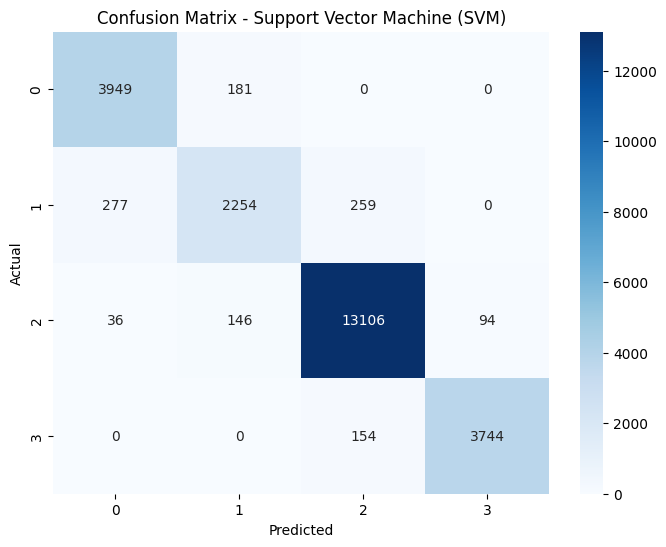

In [ ]:
# Inisialisasi model SVM
svm_model = svm.SVC()

# Latih model SVM dengan data latih yang sesuai
svm_model.fit(X_train_encoded, y_train_encoded)

# Lakukan prediksi dengan model SVM yang telah dilatih
y_pred_encoded = svm_model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluasi akurasi
acc_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_svm*100:.2f}%\n")

# Classification Report
print("Classification Report for SVM Algorithm: ")
print(classification_report(y_test, y_pred))

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Testing model
# Model 1
test = pd.DataFrame({'Usia': [20], 'Gender': [1], 'Tinggi Badan (cm)': [86.2]})

pred = svm_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 2
test = pd.DataFrame({'Usia': [10], 'Gender': [0], 'Tinggi Badan (cm)': [90]})

pred = svm_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 3
test = pd.DataFrame({'Usia': [12], 'Gender': [0], 'Tinggi Badan (cm)': [60.9]})

pred = svm_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

# Model 4
test = pd.DataFrame({'Usia': [17], 'Gender': [1], 'Tinggi Badan (cm)': [73.9]})

pred = svm_model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [2]
Predicted Score = [3]
Predicted Score = [0]
Predicted Score = [1]


5. Comparison

<ipython-input-44-dd35198bd3a7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=models, y=accuracies, palette='viridis')


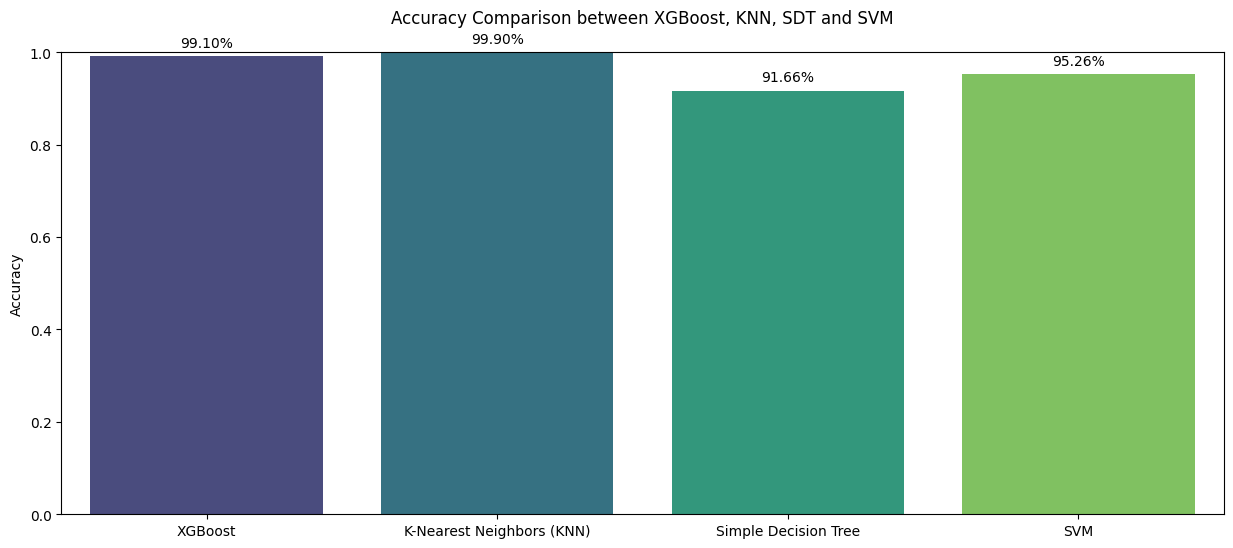

In [ ]:
# Bar chart
models = ['XGBoost', 'K-Nearest Neighbors (KNN)', 'Simple Decision Tree', 'SVM']
accuracies = [acc_xgbc, acc_knn, acc_sdt, acc_svm]

plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Accuracy Comparison between XGBoost, KNN, SDT and SVM\n')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    barplot.text(i, v + 0.02, f'{v*100:.2f}%', color='black', ha='center')

plt.show()